No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


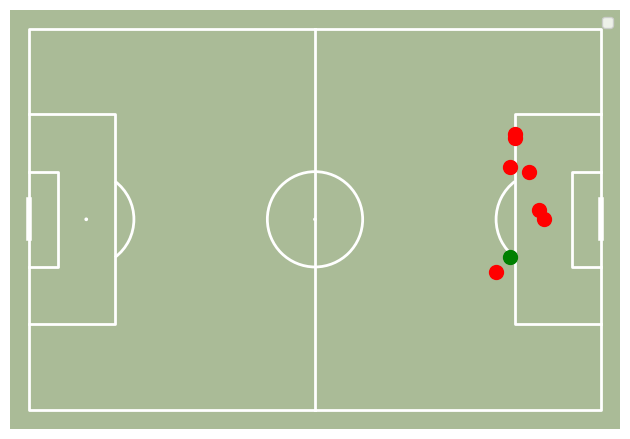

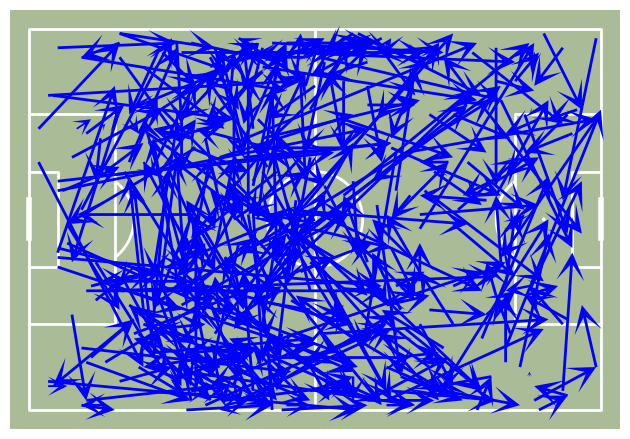

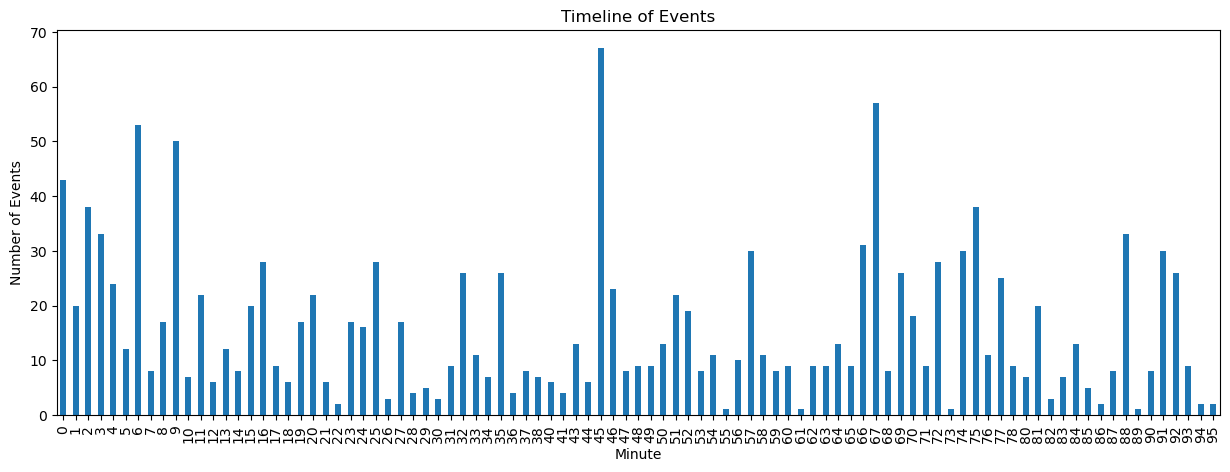

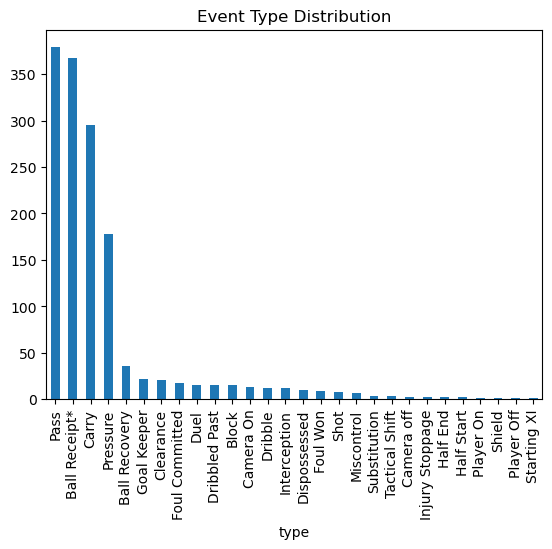

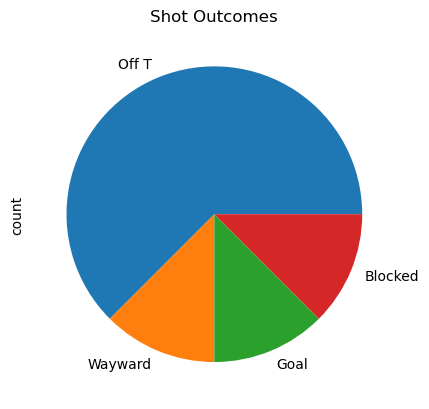

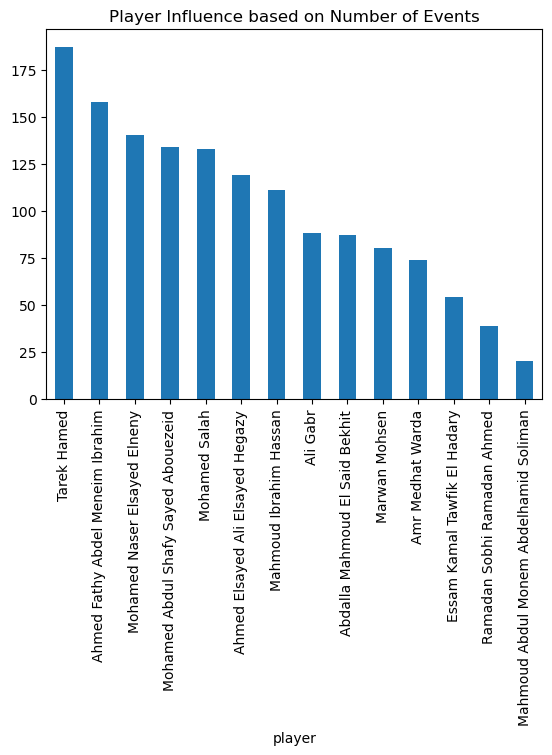

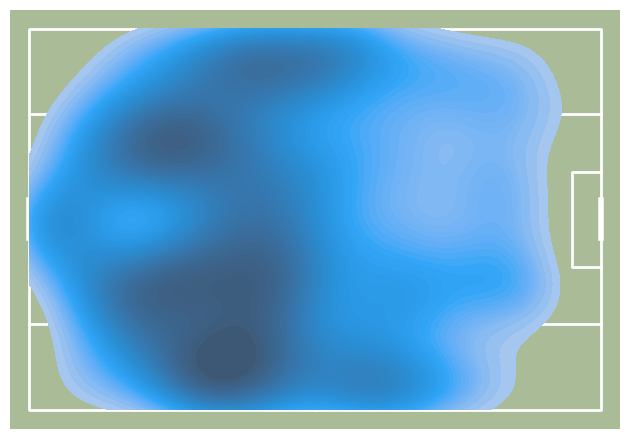

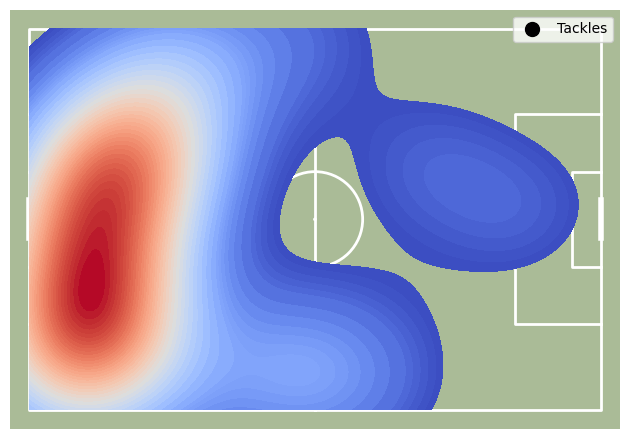

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


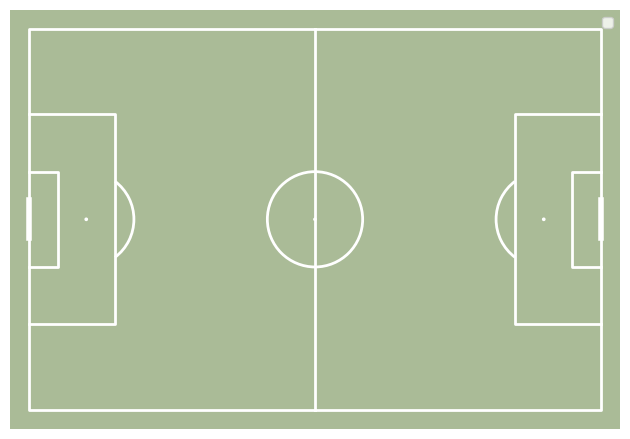

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from statsbombpy import sb

# Fetching data from StatsBomb
sb.competitions()
sb.matches(competition_id=43, season_id=3)
events = sb.events(match_id=7559)

# Preparing the events DataFrame
events = events[['team', 'type', 'minute', 'location', 'shot_outcome', 'pass_end_location' , 'shot_statsbomb_xg' , 'period','goalkeeper_outcome', 'player']]
events = events[events['team'] == 'Egypt'].reset_index()

# Filter for shots
shots = events[events['type'] == 'Shot']

# Create a pitch layout without the 'figsize' parameter
pitch = Pitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white')
fig, ax = pitch.draw()

# Plotting the shots
for i, shot in shots.iterrows():
    if shot['location'] is not None and all(pd.notna(shot['location'])) and pd.notna(shot['shot_outcome']):
        x, y = shot['location']
        if shot['shot_outcome'] == 'Goal':
            pitch.scatter(x, y, ax=ax, c='green', s=100, label='Goal' if i == 0 else "", zorder=2)
        else:
            pitch.scatter(x, y, ax=ax, c='red', s=100, label='No Goal' if i == 0 else "", zorder=2)

# Adding a legend
ax.legend(loc='upper right')

# Display the plot
plt.show()

import matplotlib.pyplot as plt
from mplsoccer import Pitch


# Filter for pass events
passes = events[(events['type'] == 'Pass') & (events['team'] == 'Egypt')]

# Create a pitch layout
pitch = Pitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white')
fig, ax = pitch.draw()

# Plotting the passes
for i, pass_ in passes.iterrows():
    # Ensure 'location' and 'pass_end_location' columns have valid data
    if pass_['location'] is not None and pass_['pass_end_location'] is not None and \
       all(pd.notna(pass_['location'])) and all(pd.notna(pass_['pass_end_location'])):
        x, y = pass_['location']
        end_x, end_y = pass_['pass_end_location']
        pitch.arrows(x, y, end_x, end_y, ax=ax, color='blue', width=2, headwidth=10, headlength=10, zorder=2)

# Display the plot
plt.show()



import matplotlib.pyplot as plt

# Assuming 'events' DataFrame has 'minute' and 'type' columns

plt.figure(figsize=(15, 5))
events['minute'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Minute')
plt.ylabel('Number of Events')
plt.title('Timeline of Events')
plt.show()


# Bar Chart for Event Types
events['type'].value_counts().plot(kind='bar')
plt.title('Event Type Distribution')
plt.show()

# Pie Chart for a specific type of event distribution, e.g., Shot Outcomes
events[events['type'] == 'Shot']['shot_outcome'].value_counts().plot(kind='pie')
plt.title('Shot Outcomes')
plt.show()

# Assuming 'events' DataFrame has 'player' column

player_events = events['player'].value_counts()
player_events.plot(kind='bar')
plt.title('Player Influence based on Number of Events')
plt.show()


from mplsoccer import Pitch
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'events' DataFrame has 'location' column
pitch = Pitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white')
fig, ax = pitch.draw()

# Extracting x and y coordinates for the heat map
x_coords = [loc[0] for loc in events['location'] if isinstance(loc, (list, tuple))]
y_coords = [loc[1] for loc in events['location'] if isinstance(loc, (list, tuple))]

# Creating a heat map with updated syntax
pitch.kdeplot(x=x_coords, y=y_coords, ax=ax, fill=True, levels=50)

plt.show()

# For the xG analysis part
# Filter for shot events
shots = events[events['type'] == 'Shot']

# Plotting each shot
for i, shot in shots.iterrows():
    if isinstance(shot['shot_statsbomb_xg'], float) and isinstance(shot['location'], (list, tuple)):
        x, y = shot['location']
        xG = shot['shot_statsbomb_xg']
        color = 'red' if shot['shot_outcome'] != 'Goal' else 'green'
        size = xG * 600  # Adjust size scaling as needed

        pitch.scatter(x, y, ax=ax, c=color, s=size, zorder=2)

# Display the plot
plt.show()



import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Filter for defensive actions (Tackles, Interceptions, Blocks)
defensive_actions = events[events['type'].isin(['Tackle', 'Interception', 'Block'])]

# Create a pitch layout
pitch = Pitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white')
fig, ax = pitch.draw()

# Extracting x and y coordinates for the heatmap
x_coords = [loc[0] for loc in defensive_actions['location'] if isinstance(loc, (list, tuple))]
y_coords = [loc[1] for loc in defensive_actions['location'] if isinstance(loc, (list, tuple))]

# Creating a heatmap
pitch.kdeplot(x=x_coords, y=y_coords, ax=ax, fill=True, levels=50, cmap='coolwarm')

# Overlay specific defensive actions, e.g., Tackles
tackles = defensive_actions[defensive_actions['type'] == 'Tackle']
tackle_x = [loc[0] for loc in tackles['location'] if isinstance(loc, (list, tuple))]
tackle_y = [loc[1] for loc in tackles['location'] if isinstance(loc, (list, tuple))]

pitch.scatter(tackle_x, tackle_y, ax=ax, color='black', label='Tackles', s=100)

# Adding a legend
ax.legend(loc='upper right')

plt.show()

